In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
anime = pd.read_csv("./anime.csv")

# Data preprocessing

first need to check the datatypes of the columns

In [230]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [231]:
anime.shape

(12294, 7)

In [232]:

anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Most of the data type is reasonable, but the episodes shouldn't be object type, should be integer instead

Let check the unique values inside the episodes value

In [233]:
episodes = anime.episodes


In [234]:
episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

Now we know that the column include Unkown values, let's check total number of Unknow value

In [235]:
# check the number of Unknown values
(episodes=="Unknown").sum()

340

In [236]:
# check the portion of Unknown values
ep_percent=((episodes=="Unknown").sum()/len(episodes))*100
print(ep_percent,"%")


2.7655767040832924 %


There are only 2 persents of Unknow value, so just drop the unknown value

In [237]:
# drop the unknown values
# anime = anime.drop(anime[anime.episodes=="Unknown"].index)
# anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
# anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"

# anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"
# anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)
# anime["episodes"].fillna(anime["episodes"].median(),inplace = True)
anime.loc[(anime["episodes"]=="Unknown"),"episodes"] = "200"
anime.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       '200', '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '6', '8', '14', '7', '40', '15', '203', '77', '291', '120', '102',
       '96', '38', '79', '175', '103', '70', '153', '45', '5', '21', '63',
       '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358',
       '155', '104', '113', '54', '167', '161', '42', '142', '31', '373',
       '220', '46', '195', '17', '1787', '73', '147', '127', '16', '19',
       '98', '150', '76', '53', '124', '29', '115', '224', '44', '58',
       '93', '154', '92', '67', '172', '86', '30', '276', '59', '72',
       '330', '41', '105', '128', '137', '56', '55', '65', '243', '193',
       '18', '191', '180', '91', '192', '66', '182', '32', '164', '100',
       '296', '694', '95', '68', '117', '151', '130', '87

In [238]:
(anime.episodes=="Unknown").sum()

0

In [239]:
# check the unique value in type attribute
anime.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [240]:
anime.rating.isna().sum()

230

In [241]:
#drop the missing values in rating
anime = anime.drop(anime[anime.rating.isna()].index)

In [242]:
anime.shape

(12064, 7)

In [243]:
anime.rating.isna().sum()


0

<AxesSubplot:>

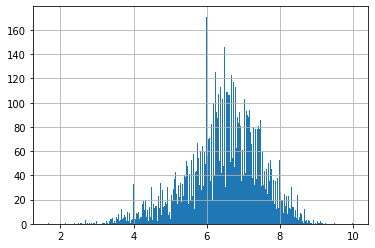

In [244]:
#check the distribution of the rating by range
anime.rating.astype(float).hist(bins=500)


In [245]:
#in order to make the data normalized, just drop the rating below 3, also the rating is not helpful because it means most people don't like the anime
anime = anime.drop(anime[anime.rating.astype(float)<2].index)

<AxesSubplot:>

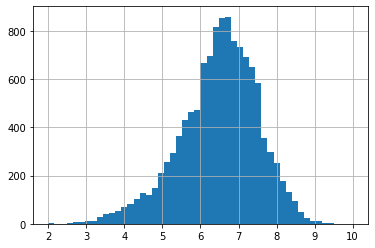

In [246]:
anime.rating.astype(float).hist(bins=50)

<AxesSubplot:>

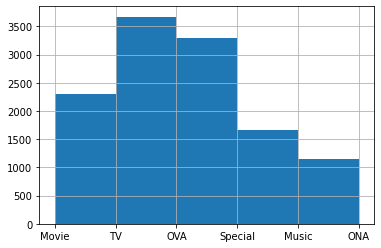

In [247]:
#check the distribution of the type attribute
anime.type.hist(bins=5)

In [248]:
#that seems not bad, so i just leave that
anime.shape

(12062, 7)

# Feature Engineering

In order to fit the KNN model, we have to transfer the catergorical value into numerical value by using one hot encoding.
The next step is to figure out the how to transfer the type.

In [249]:
# firstly, let's transform the genre attribute into seprate columns
genre_dummies = anime["genre"].str.get_dummies(sep=", ")
anime = pd.concat([anime, genre_dummies], axis=1)


In [250]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
len(anime.columns)

50

In [252]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [253]:
# check the distribution of each genre
dic = {}
for i in anime.columns[6:]:

    num_1 = anime.loc[anime[i]==1].shape[0]
    num_0 = anime.loc[anime[i]==0].shape[0]
    if num_1+num_0 != anime.shape[0]:
        print("error")
    else:
        dic[i] = num_1
dic =dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))
dic

error


{'Comedy': 4575,
 'Action': 2767,
 'Adventure': 2316,
 'Fantasy': 2242,
 'Sci-Fi': 2035,
 'Drama': 1977,
 'Shounen': 1683,
 'Kids': 1598,
 'Romance': 1437,
 'Slice of Life': 1203,
 'School': 1176,
 'Hentai': 1132,
 'Supernatural': 1001,
 'Mecha': 929,
 'Music': 842,
 'Historical': 798,
 'Magic': 747,
 'Ecchi': 628,
 'Shoujo': 594,
 'Sports': 533,
 'Seinen': 532,
 'Mystery': 485,
 'Super Power': 451,
 'Military': 416,
 'Parody': 403,
 'Space': 377,
 'Horror': 362,
 'Harem': 313,
 'Demons': 287,
 'Martial Arts': 264,
 'Dementia': 238,
 'Psychological': 226,
 'Police': 195,
 'Game': 177,
 'Samurai': 146,
 'Vampire': 100,
 'Thriller': 86,
 'Cars': 72,
 'Shounen Ai': 62,
 'Shoujo Ai': 54,
 'Josei': 52,
 'Yuri': 41,
 'Yaoi': 38}

In [254]:
len(dic.keys())+6

49

([<matplotlib.patches.Wedge at 0x1567d2170>,
 [Text(1.0115132630783217, 0.43225099030152153, 'Comedy'),
  Text(0.5454810398575032, 0.9552227149497531, 'Action'),
  Text(0.07713037750101595, 1.0972925338607527, 'Adventure'),
  Text(-0.3587012285260388, 1.0398718328014807, 'Fantasy'),
  Text(-0.716771089651371, 0.8344094948165357, 'Sci-Fi'),
  Text(-0.9616550632401386, 0.5340594904545797, 'Drama'),
  Text(-1.0814577988693244, 0.2011194402953531, 'Shounen'),
  Text(-1.0938550977435664, -0.11610781687902472, 'Kids'),
  Text(-1.0240995974219915, -0.4015221221304191, 'Romance'),
  Text(-0.903692491708997, -0.6271681436654643, 'Slice of Life'),
  Text(-0.7531009351986464, -0.8017724000007261, 'School'),
  Text(-0.5753071847356065, -0.9375615410156236, 'Hentai'),
  Text(-0.3896533284483058, -1.02867404148698, 'Supernatural'),
  Text(-0.20960926748286357, -1.0798444123971276, 'Mecha'),
  Text(-0.03892858233830631, -1.099310950312572, 'Music'),
  Text(0.12006588428007374, -1.093427722088682, 'Hi

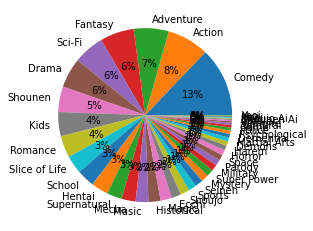

In [255]:
plt.pie( list(dic.values()),labels=list(dic.keys()),autopct='%1.0f%%')

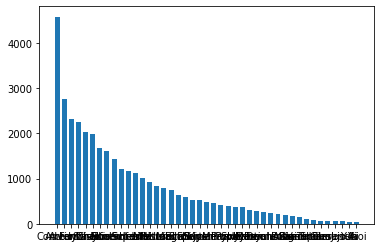

In [256]:
plt.bar(list(dic.keys()), dic.values(),width=0.7)
plt.autoscale()


Now let's handle the type

In [257]:
type_pd = pd.get_dummies(anime[["type"]])

In [258]:
# check the distribution of each type
dic = {}
for i in type_pd.columns:

    num_1 = anime.loc[type_pd[i]==1].shape[0]
    num_0 = anime.loc[type_pd[i]==0].shape[0]
    if num_1+num_0 != anime.shape[0]:
        print("error")
    else:
        dic[i] = num_1
dic =dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))
dic

{'type_TV': 3671,
 'type_OVA': 3285,
 'type_Movie': 2296,
 'type_Special': 1670,
 'type_ONA': 652,
 'type_Music': 488}

([<matplotlib.patches.Wedge at 0x15716fd60>,
 [Text(0.6343585717188146, 0.8986596700013112, 'type_TV'),
  Text(-1.0240607353404896, 0.40162122744433715, 'type_OVA'),
  Text(-0.5186154750571543, -0.9700711257589529, 'type_Movie'),
  Text(0.567439261904272, -0.9423442492261176, 'type_Special'),
  Text(1.0025871868271012, -0.45256925747350474, 'type_ONA'),
  Text(1.0911268222252424, -0.13943549698926921, 'type_Music')],
 [Text(0.34601376639208065, 0.490178001818897, '30%'),
  Text(-0.5585785829129942, 0.2190661240605475, '27%'),
  Text(-0.28288116821299325, -0.5291297049594288, '19%'),
  Text(0.3095123246750574, -0.5140059541233368, '14%'),
  Text(0.5468657382693278, -0.24685595862191162, '5%'),
  Text(0.5951600848501322, -0.07605572563051048, '4%')])

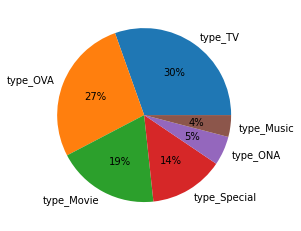

In [259]:
plt.pie( list(dic.values()),labels=list(dic.keys()),autopct='%1.0f%%')

<BarContainer object of 6 artists>

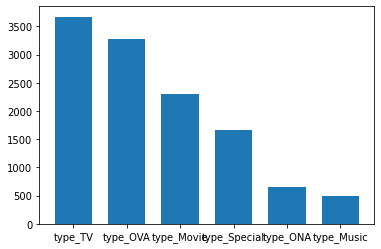

In [260]:
plt.bar(list(dic.keys()), dic.values(),width=0.7)

In [261]:
anime_features = pd.concat([anime["genre"].str.get_dummies(sep=", "),pd.get_dummies(anime[["type"]]),anime[["rating","episodes"]]],axis=1)

In [262]:
anime_features.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,episodes
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,9.37,1
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,9.26,64
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,9.25,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,9.17,24
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,9.16,51


In [263]:
from sklearn.neighbors import NearestNeighbors

In [264]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)

In [265]:
distances, indices = nbrs.kneighbors(anime_features)

In [266]:
all_anime_names = list(anime.name.values)

In [267]:
def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [268]:
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [269]:
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.ix[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.loc[id]["name"])

In [270]:
print_similar_animes(query="Naruto: Shippuuden")

Dragon Ball Super
Nintama Rantarou
Baki
One Piece
Penguin no Mondai Movie


In [271]:
print_similar_animes(query="One Piece")

Dragon Ball Super
Naruto: Shippuuden
Yu☆Gi☆Oh! Arc-V
Teach
Detective Conan


In [272]:
print_similar_animes(query="Detective Conan")

Kaitou Joker 4th Season
Teach
Nintama Rantarou
Penguin no Mondai Movie
Doraemon (2005)


In [273]:
print_similar_animes("Kimi no Na wa.")

Kokoro ga Sakebitagatterunda.
Hotarubi no Mori e
Koe no Katachi
Mirai Kara no Message
Sen to Chihiro no Kamikakushi
